<a href="https://colab.research.google.com/github/Amy-0502/MyPython/blob/main/DeepLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.vgg16 import VGG16
import keras.utils as image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [3]:
model = VGG16(weights='imagenet', include_top=True) 

553467096/553467096 [==============================] - 23s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/gdrive') # 此處需要登入google帳號


Mounted at /content/gdrive


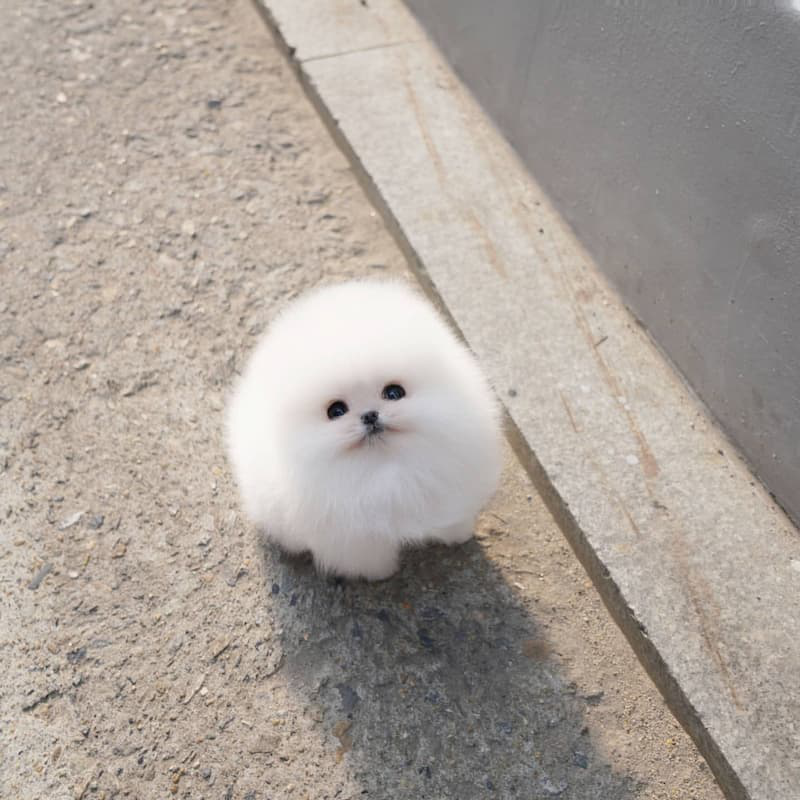

In [9]:
from PIL import Image
img=Image.open('/content/gdrive/MyDrive/Colab Notebooks/MyPet/dog.jpg')
img.show()

In [12]:
# Input：要辨識的影像
img_path = '/content/gdrive/MyDrive/Colab Notebooks/MyPet/dog.jpg'
#img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

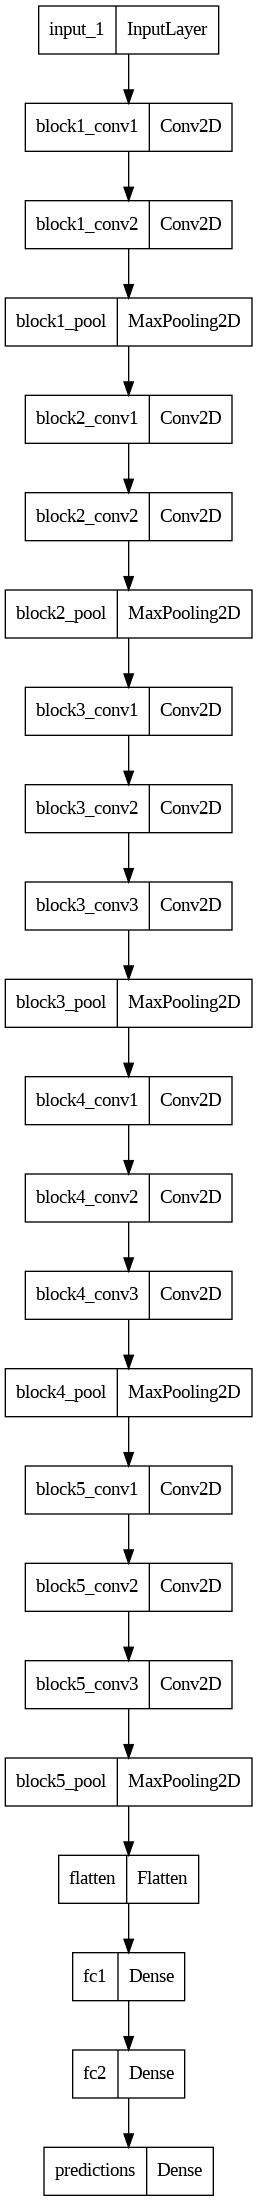

In [8]:
from keras.utils import plot_model
model.summary()
plot_model(model, to_file='model.png')

In [ ]:
# 預測，取得features，維度為 (1,7,7,512)
features = model.predict(x)
# 取得前三個最可能的類別及機率
print('Predicted:', decode_predictions(features, top=3)[0])